In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

import scipy.sparse as sp
import scipy.sparse.linalg as spla
from scipy.linalg import toeplitz, circulant
from scipy.stats import linregress as linreg

import scipy.fftpack as fft

import sympy as smp

from pytex import *

In [2]:
matplotlib.rcParams.update({'font.size': 14})

In [3]:
N = 10
w = np.exp((2j)*np.pi/N )
W = w ** np.multiply.outer(np.arange(N), np.arange(N))
Wc = W.conj().T
x = np.random.randn(N)
x_hat = fft.fft(x)
X = circulant(x)
print('Verify theorem: ', la.norm(np.diag(1/N*Wc @ X @ W) - x_hat))
print('Verify dft: \t', la.norm(Wc@x - x_hat))

Verify theorem:  1.453332403041114e-14
Verify dft: 	 8.372546959417354e-15


# 2

In [4]:
def toep_mult(A, x):
    N = len(x)
    a = np.block([A[:,0], A[0,:0:-1]] )
    a_hat = fft.fft(a)
    x_hat = fft.fft(np.block([x, np.zeros(N-1)]))
    b_hat = a_hat * x_hat # * len(a_hat) - Scipy's FFT isn't scaled
    b = fft.ifft(b_hat)
    return b[:N]

In [5]:
x_new = np.zeros(2*N-1)
x_new[:N] = x

In [6]:
Ns = [10, 100, 500, 1000, 5000]
times = 100

errs = []

for N in Ns:
    my_errs = []
    A = toeplitz([1/i for i in range(1,N+1)], [-1/i for i in range(1,N+1)]).T
    for i in range(times):
        x = np.random.randn(N)
        err = np.max(np.abs(A@x - toep_mult(A,x)))
        my_errs.append(err)
    errs.append(my_errs)

my_maxs = np.max(errs, axis=1)
my_mins = np.min(errs, axis=1)
my_ave  = np.mean(errs, axis=1)

In [7]:
latex_table([Ns, my_mins, my_ave, my_maxs], ['$N$', 'Min $L^\infty$ Error', 'Average $L^\infty$ Error', 'Max $L^\infty$ Error'])

	\begin{center}
		\begin{tabular}{|c|c|c|c|}
			\hline
			$N$&Min $L^\infty$ Error&Average $L^\infty$ Error&Max $L^\infty$ Error\\ \hline
			10&1.0547e-15&3.7487e-15&7.7716e-15\\ \hline
			100&3.5172e-13&6.3489e-13&9.8588e-13\\ \hline
			500&6.8065e-15&9.4596e-15&1.6112e-14\\ \hline
			1000&4.0152e-11&5.1546e-11&7.1526e-11\\ \hline
			5000&9.9476e-14&1.2108e-13&1.5898e-13\\ \hline
		\end{tabular}
	\end{center}


In [17]:
Ns = [900 + 1*i for i in range(200)]
times = 10

errs = []

for N in Ns:
    my_errs = []
    A = toeplitz([1/i for i in range(1,N+1)], [-1/i for i in range(1,N+1)]).T
    A = np.abs(A)
    for i in range(times):
        x = np.abs(np.random.randn(N))
        err = np.max(np.abs(A@x - toep_mult(A,x)))
        my_errs.append(err)
    errs.append(my_errs)

my_maxs = np.max(errs, axis=1)
my_mins = np.min(errs, axis=1)
my_ave  = np.mean(errs, axis=1)

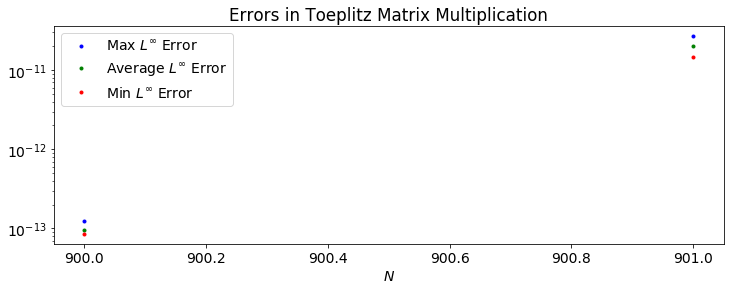

In [18]:
#latex_table([Ns, my_mins, my_ave, my_maxs], ['$N$', 'Min $L^\infty$ Error', 'Average $L^\infty$ Error', 'Max $L^\infty$ Error'])
plt.figure(figsize=(12,4))
plt.semilogy(Ns, my_maxs,'b.')
plt.semilogy(Ns, my_ave,'g.')
plt.semilogy(Ns, my_mins,'r.')
plt.legend(['Max $L^\infty$ Error', 'Average $L^\infty$ Error', 'Min $L^\infty$ Error'])
plt.title('Errors in Toeplitz Matrix Multiplication')
plt.xlabel('$N$')
plt.show()

In [40]:
A.shape
A_new = np.zeros(A.shape)
for i, v in enumerate(A.T):
    A_new[i] = v*x[i]
A_new = A_new.T
A_new.sort(axis=1)
x_new = np.sum(A_new, axis=1)
#print(A_new[0:5,0:5])
print(la.norm(x_new - A@x))
print(la.norm(x_new - toep_mult(A,x)))

2.9318364691025504e-13
1.0731282034814448e-10


In [31]:
np.max(my_maxs/my_mins)

4.398416712859725

In [102]:
N = 4
A = toeplitz([1/i for i in range(1,N+1)], [-1/i for i in range(1,N+1)]).T
A2 = toeplitz(1/np.arange(1,N+1), -1/np.arange(1,N+1)).T
A3 = toeplitz([1] + [1/i for i in range(2,N+1)], [1/i for i in range(1,N+1)])
print(A)
print(A2)
print(A3)

[[ 1.          0.5         0.33333333  0.25      ]
 [-0.5         1.          0.5         0.33333333]
 [-0.33333333 -0.5         1.          0.5       ]
 [-0.25       -0.33333333 -0.5         1.        ]]
[[ 1.          0.5         0.33333333  0.25      ]
 [-0.5         1.          0.5         0.33333333]
 [-0.33333333 -0.5         1.          0.5       ]
 [-0.25       -0.33333333 -0.5         1.        ]]
[[1.         0.5        0.33333333 0.25      ]
 [0.5        1.         0.5        0.33333333]
 [0.33333333 0.5        1.         0.5       ]
 [0.25       0.33333333 0.5        1.        ]]


# 3(d)

In [34]:
def test_dst(x):
    N = len(x)+1
    sines = np.sin(np.pi/N * np.multiply.outer(np.arange(1,N), np.arange(1,N)))
    return 1/N * sines @ x
    
def test_idst(x):
    N = len(x)+1
    sines = np.sin(np.pi/N * np.multiply.outer(np.arange(1,N), np.arange(1,N)))
    return 2 * sines @ x

def foo1(x):
    return np.sin(3*x)
def exact1(x):
    return -1/9*np.sin(3*x)

def foo2(x):
    return np.tanh(4*np.sin(x))
exact2 = None

In [31]:
x = smp.symbols('x')
f = smp.tanh(4*smp.sin(x))
#print(f.integrate(x))
smp.integrate(x**3, x)

x**4/4

In [5]:
def fast_tri_diag(a, b, fs):
    n = len(fs)
    f_hat = fft.dst(fs,type=1)/(2*n+2)
    u_hat = f_hat / (2*a * np.cos(np.pi*np.arange(1,n+1)/(n+1)) + b)
    return fft.idst(u_hat, type=1)

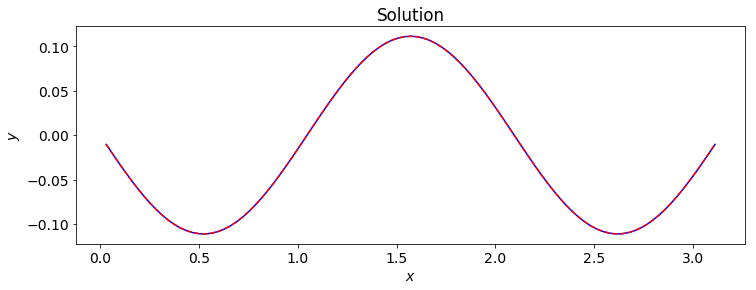

In [33]:
foo, exact = foo1, exact1

n = 10**2-1 #solves for n points on the interior
#N = n-1
a = 1
b = -2

D = sp.diags([[b]*n, [a]*(n-1), [a]*(n-1)], offsets=[0,1,-1], format='csr')
h = np.pi/(n+1)
xs = np.pi* np.arange(1, n+1)/(n+1)
fs = foo1(xs) * h**2

#u = spla.spsolve(D,fs)
#u = exact1(xs)

f_hat = fft.dst(fs,type=1)/(2*n+2) # the dst in scipy must be normalized
u_hat = f_hat / (2*a * np.cos(np.pi*np.arange(1,n+1)/(n+1)) + b)

u2 = fft.idst(u_hat, type=1)

#print(la.norm(u-u2))

plt.figure(figsize=(12,4))
plt.plot(xs, u2, 'b-')
if exact != None:
    plt.plot(xs, exact1(xs), 'r--')

plt.title('Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [21]:
xs

array([0.31415927, 0.62831853, 0.9424778 , 1.25663706, 1.57079633,
       1.88495559, 2.19911486, 2.51327412, 2.82743339])

In [22]:
fs

array([0.08333207, 0.09692091, 0.09839136, 0.09859814, 0.09862985,
       0.09859814, 0.09839136, 0.09692091, 0.08333207])

In [24]:
np.min(u2)

-1.2053586238133964

In [86]:
h**2

9.869604401089355e-10

In [39]:
len(xs)

1000

In [72]:
f2 = test_dst(f)
la.norm(f2 - fft.dst(f, type=1)/(2*n+2))

5.547728002917695e-15

In [85]:
la.norm(f - fft.dst(fft.dst(f, type=1)/(2*n+2), type=1))

5.4672143489065705e-16

In [74]:
la.norm(f - fft.dst(test_dst(f), type=1))

1.032034014607267e-13

In [76]:
u_hat[:5]

array([ 0.4670243 , -0.0537676 ,  0.15689964, -0.02720325,  0.09564448])

In [92]:
np.tanh(3)

0.9950547536867305

In [328]:
lst = []
for i in range(10):
    lst.append([])
lst[0].append('1')

In [329]:
lst

[['1'], [], [], [], [], [], [], [], [], []]

In [336]:
lst = [[]]*10
lst[0].append('a')

In [337]:
lst

[['a'], ['a'], ['a'], ['a'], ['a'], ['a'], ['a'], ['a'], ['a'], ['a']]

# 4

In [6]:
def exact(x,k):
    k2 = 1/k**2
    k_comp = 1-k2
    return k2 + k_comp*np.cos(k*x) - (k2 + k_comp*np.cos(k))/np.sin(k)*np.sin(k*x)

In [7]:
a, b = 0, 1
alpha, beta = 1, 0
f0, f_last = 1, 1
k = 150
n = 2**15 - 1

h = 1/(n+1)

h2 = h**2
k2 = k**2

xs = np.linspace(a+h, b-h, n)

D = sp.diags([[12/h2+k2]*(n-1), [10*k2-24/h2]*n, [12/h2+k2]*(n-1) ], offsets=[-1, 0, 1], format='csr')
E = sp.diags([[1]*(n-1), [10]*n, [1]*(n-1)], offsets=[-1, 0, 1], format='csr')

fs = E@np.ones(n)
fs[0] += f0 - (12/h2+k2)*alpha
fs[-1] += f_last - (12/h2+k2)*beta

#us = spla.spsolve(D, fs)
us = fast_tri_diag(12/h2+k2, 10*k2-24/h2, fs)

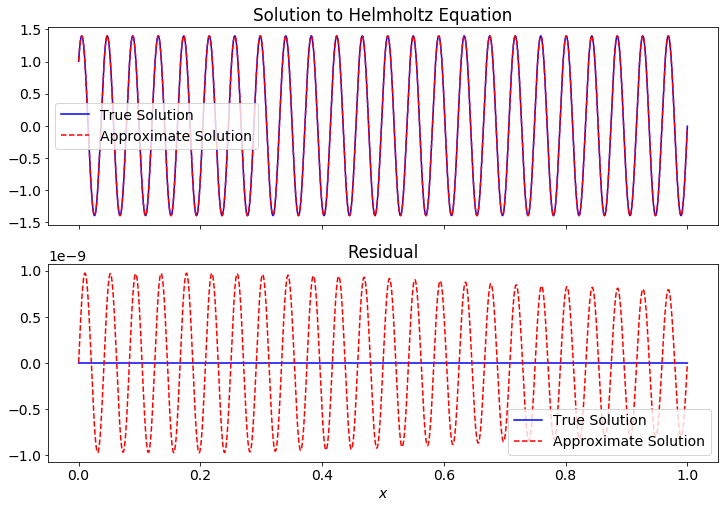

In [8]:
fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))

axs[0].plot(xs, exact(xs,k), 'b')
axs[0].plot(xs, us, 'r--')
axs[0].set_title('Solution to Helmholtz Equation')
axs[1].set_title('Residual')
axs[1].plot(xs, [0]*len(xs), 'b-')
axs[1].plot(xs, us-exact(xs,k), 'r--')
#axs[0].set(ylabel='y-label')
#axs[1].set(ylabel='y-label')
axs[0].legend(['True Solution','Approximate Solution'])
axs[1].legend(['True Solution','Approximate Solution'])
plt.xlabel('$x$')
plt.show()

In [9]:
a, b = 0, 1
alpha, beta = 1, 0
f0, f_last = 1, 1
k = 150

hs = [2**-i for i in range(7,20)]

ns = [int(1/h-1) for h in hs]
k2 = k**2
errs = []
for h in hs:
    n = int(1/h-1)
    xs = np.linspace(a+h, b-h, n)

    h2 = h**2

    D = sp.diags([[12/h2+k2]*(n-1), [10*k2-24/h2]*n, [12/h2+k2]*(n-1) ], offsets=[-1, 0, 1], format='csr')
    E = sp.diags([[1]*(n-1), [10]*n, [1]*(n-1)], offsets=[-1, 0, 1], format='csr')

    fs = E@np.ones(n)
    fs[0] += f0 - (12/h2+k2)*alpha
    fs[-1] += f_last - (12/h2+k2)*beta

    #us = spla.spsolve(D, fs)
    us = fast_tri_diag(12/h2+k2, 10*k2-24/h2, fs)
    u_true = exact(xs, k)
    
    err = la.norm(us-u_true)/la.norm(u_true)
    errs.append(err)

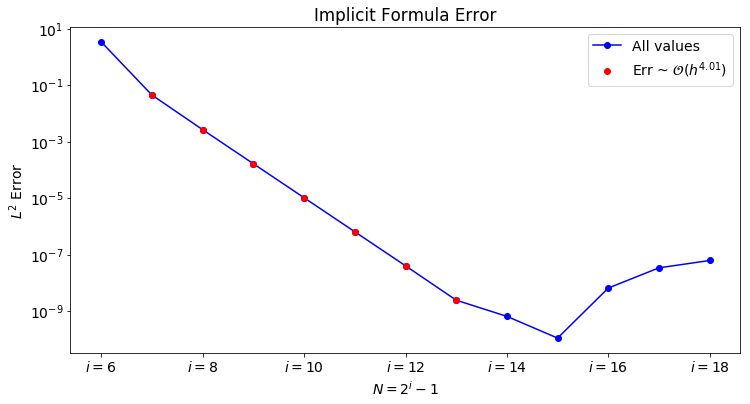

In [10]:
#x_labels = ['$2^{-%d}-1$'%int(np.log(n)/np.log(2)) for n in ns ]
x_labels = ['$i=%d$'%int(np.log(n)/np.log(2)) for n in ns ]
start=1
end = 8
order = -linreg(np.log(ns[start:end]), np.log(errs[start:end]))[0]

plt.figure(figsize=(12,6))
plt.loglog(ns, errs, 'b-o')
plt.loglog(ns[start:end], errs[start:end], 'ro')
plt.xticks(ns[::2], x_labels[::2])
plt.minorticks_off()
plt.legend(['All values', 'Err ~ $\mathcal{O}(h^{%.2f})$' % order])
plt.xlabel('$N=2^i-1$')
#plt.xlabel('$N$')
plt.ylabel('$L^2$ Error')
plt.title('Implicit Formula Error')
plt.show()

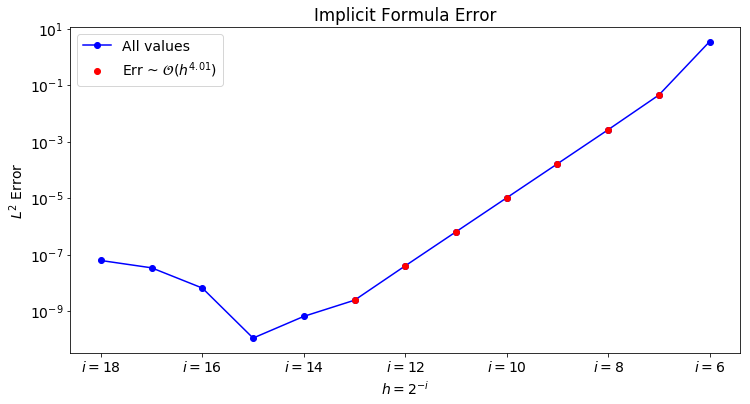

In [18]:
#x_labels = ['$2^{-%d}-1$'%int(np.log(n)/np.log(2)) for n in ns ]
x_labels = ['$i=%d$'%int(np.log(n)/np.log(2)) for n in ns]
start=1
end = 8
order = -linreg(np.log(ns[start:end]), np.log(errs[start:end]))[0]

plt.figure(figsize=(12,6))
plt.loglog(hs, errs, 'b-o')
plt.loglog(hs[start:end], errs[start:end], 'ro')
plt.xticks(hs[::2], x_labels[::2])
plt.minorticks_off()
plt.legend(['All values', 'Err ~ $\mathcal{O}(h^{%.2f})$' % order])
plt.xlabel('$h=2^{-i}$')
#plt.xlabel('$N$')
plt.ylabel('$L^2$ Error')
plt.title('Implicit Formula Error')
plt.show()